# BB84 Protocol and Quantum Key Distribution
***

In [6]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit_aer import StatevectorSimulator, QasmSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display, Math, Latex
import math as m
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

S_simulator = StatevectorSimulator()
M_simulator = QasmSimulator()

# QKD with BB84 protocol

* Quantum Key Distribution protocol proposed by Bennett and Brassard in 1984
* Context: Alice and Bob are trying to share a message. Eve is trying to illegally intercept this message. Alice and Bob must protect their message from the eavesdropper (Eve).

Solution: 

A one-time key is an impenetrable encryption method that Alice can use to send Bob a secret message. Simply said, a one-time key is a key that is only ever used once.

Why does this work:

Alice and Bob would have put that key away and moved on to another, by the time Eve gets her hands on the message. Therefore, Eve is unable to decrypt the message unless she has access to the key or can correctly predict the key.

Key Distribution: 

Getting the key to both communication parties while reducing the possibility of Eve learning about it is the process of key distribution. This process when implemented using the advantage of quantum systems gives rise to QKD. So, essentially, QKD consists of 2 broad steps. In the 1st part, we use some quantum principles to try to eliminate the presence of an eavesdropper and generate a secure key. In the 2nd part, we use the generated key to decrypt the message, also known as 'Classical post-processing'.

## The BB84 Protocol

In the straightforward "prepare and measure" BB84 protocol, Alice prepares a series of qubits, sends the qubits to Bob, and Bob measures the qubits. Those for which the two measurement bases do not agree are discarded. The remainder of the bit string is used as the raw key, and a portion is utilised to check for an eavesdropper (Eve).

The protocol works something like this:

- Alice generates a random bit string.
- Alice encodes the bits in qubit states by randomly choosing between two bases, say, the perpendicular (z) and diagonal (x) bases.

She follows a convention that she established before hand, perhaps something like this:

|   | 0  | 1  |
|---|---|---|
|  z basis | $\uparrow$  | $\rightarrow$  |  
|  x basis | $\nwarrow$  | $\nearrow$  |   

Suppose Alice generates the bit string 100100. She then prepares a set of 6 qubits in the following manner:


|  Alice's Random Bits |  1 | 0  | 0  | 1  | 0  | 0  |
|---|---|---|---|---|---|---|
| Alice's Random Basis Choice |  X | Z  |  Z |  X | Z  | X  |
| What Alice Sends Bob  |  $\nearrow$ |  $\uparrow$ | $\uparrow$  | $\nearrow$  | $\uparrow$  | $\nwarrow$  |


- Alice sends the qubit sequence to Bob over a quantum channel.
- Bob randomly chooses his measurement bases.
- Alice and Bob publicize their measurement bases choices through an open communication channel, and retain those qubits for which the bases match.


|  Alice's Random Bits |  1 | 0  | 0  | 1  | 0  | 0  |
|---|---|---|---|---|---|---|
| Alice's Random Basis Choice |  X | Z  |  Z |  X | Z  | X  |
|  What Alice Sends Bob |  $\nearrow$ |  $\uparrow$ | $\uparrow$  | $\nearrow$  | $\uparrow$  | $\nwarrow$  |
| Bob's Random Basis Choice  | X  | Z  |  X | X  | Z  | Z  |
| Shared Information  | 1  | 0  | -  | 1  | 0  |  -  |

- A subset of the sequence is used to check for the presence of an eavesdropper. So, if the first two bits are selected, then Alice and Bob would check if they both have the result 10. If their answers don't match, then Eve was probably snooping around. If their answers match, they can use the rest of the sequence, the second 10, as a raw key.

This is the end of the BB84 protocol, but Alice and Bob are not quite yet done with their work. They still have the classical component of QKD to work through! The key that they have at the end of the quantum part is a raw key. Usually the raw key is just that: raw with errors. A final key is distilled from the raw key through post-processing that is completely classical, because they are now working with bit strings. Post-processing includes  privacy amplification and information reconcilliation.

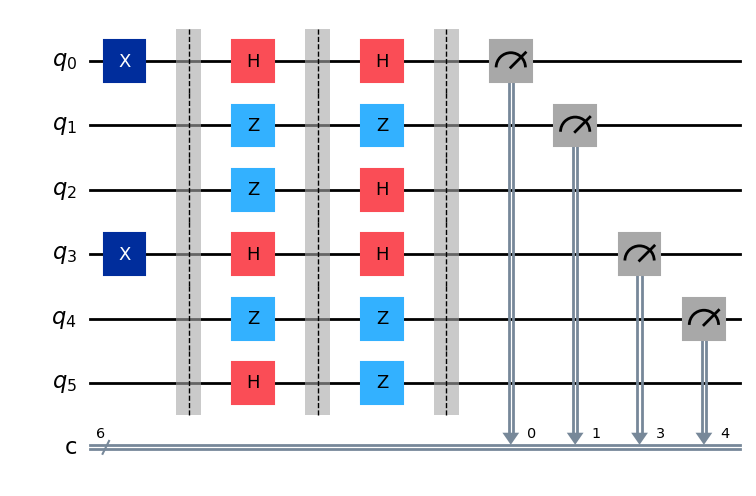

In [7]:
from qiskit import *
from qiskit.visualization import plot_histogram

qc_ab = QuantumCircuit(6,6) #Create a quantum circuit with 6 qubits and 6 classical bits


##ENCODE BIT STRING
#The random bit sequence Alice needs to encode is: 100100, so the first and fourth qubits are flipped from |0> -> |1>
qc_ab.x(0) #The first qubit is indexed at 0, following Python being zero-indexed. From now on it'll be referred to as qubit 0 and so on.
qc_ab.x(3) 
qc_ab.barrier()


##ALICE CHOOSES
#Alice randomly chooses to apply an X or an H.  
#Note that since the state is already either a |0> or |1>, a Z essentially leaves the qubit state unchanged. But let's write it anyway, shall we? 

qc_ab.h(0) # or qc_ab.z(0) # switch these based on your own choice
qc_ab.z(1) # or qc_ab.h(1)
qc_ab.z(2) # or qc_ab.h(2)
qc_ab.h(3) # or qc_ab.z(3)
qc_ab.z(4) # or qc_ab.h(4)
qc_ab.h(5) # or qc_ab.z(5)
qc_ab.barrier()


##BOB CHOOSES
#Alice sends the qubit sequence to Bob, and Bob randomly chooses measurements
qc_ab.h(0) # or qc_ab.z(0) # switch these based on your own choice
qc_ab.z(1) # or qc_ab.h(1)
qc_ab.h(2) # or qc_ab.z(2)
qc_ab.h(3) # or qc_ab.z(3)
qc_ab.z(4) # or qc_ab.h(4)
qc_ab.z(5) # or qc_ab.h(5)
qc_ab.barrier()


##PUBLICIZE CHOICES
#Alice and Bob publicize their choices and only retain those for which their choices match. In this case: qubits 0,1,3,4. 
#Note: technically Bob performs the measurement BEFORE publicizing, but we're combining the two here since no one is actually communicating.

qc_ab.measure(0,0)
qc_ab.measure(1,1)
qc_ab.measure(3,3)
qc_ab.measure(4,4)


#qc_ab.measure(2,2) #come back to uncomment these to see what happens to the results after you've run this once
#qc_ab.measure(5,5)


qc_ab.draw('mpl'); #let's see what this circuit looks like!

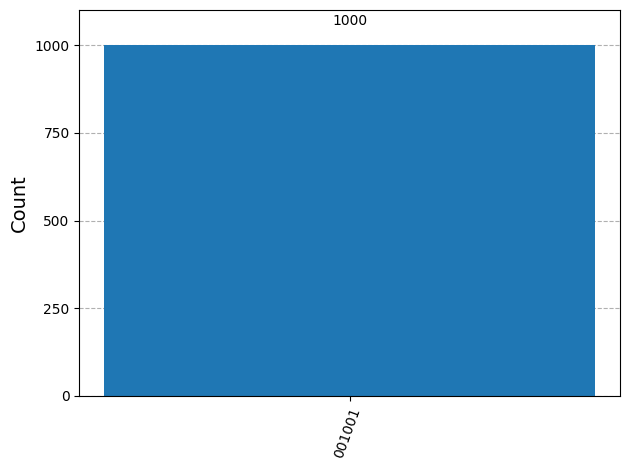

In [8]:
# Assuming qc_ab is your quantum circuit
result = M_simulator.run(qc_ab, shots = 1000).result()
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts);

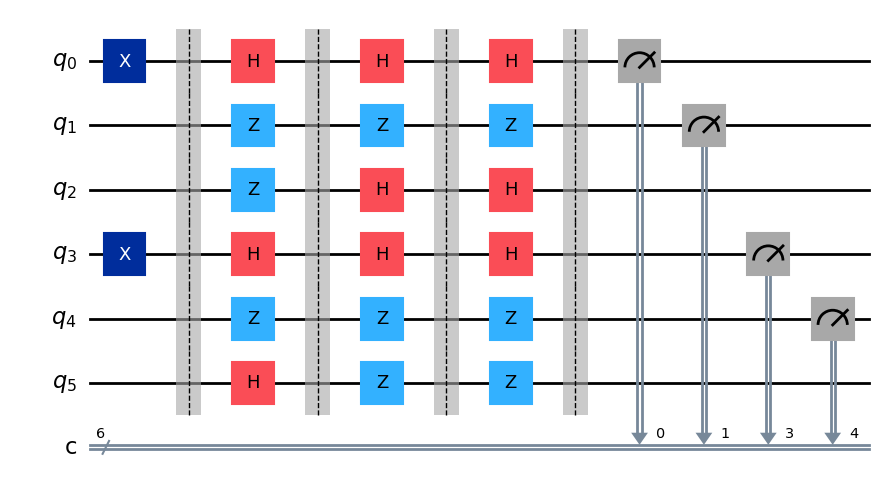

In [9]:
#Same situation but now with an eavesdropper (Eve) 

qc_aeb = QuantumCircuit(6,6) #Create a quantum circuit with 6 qubits and 6 classical bits

##ENCODE BIT STRING
qc_aeb.x(0) 
qc_aeb.x(3) 
qc_aeb.barrier()

##ALICE CHOOSES
qc_aeb.h(0) 
qc_aeb.z(1) 
qc_aeb.z(2) 
qc_aeb.h(3) 
qc_aeb.z(4) 
qc_aeb.h(5) 
qc_aeb.barrier()

##EVE CHOOSES
qc_aeb.h(0) #play around with these to see how many states with non-zero probabilities show up at the end for a fixed set of Alice's and Bob's choices
qc_aeb.z(1) 
qc_aeb.h(2) 
qc_aeb.h(3) 
qc_aeb.z(4) 
qc_aeb.z(5) 
qc_aeb.barrier()

##BOB CHOOSES
qc_aeb.h(0) 
qc_aeb.z(1) 
qc_aeb.h(2) 
qc_aeb.h(3) 
qc_aeb.z(4) 
qc_aeb.z(5) 
qc_aeb.barrier()


##PUBLICIZE CHOICES

qc_aeb.measure(0,0)
qc_aeb.measure(1,1)
qc_aeb.measure(3,3)
qc_aeb.measure(4,4)

#qc_aeb.measure(2,2) #come back to uncomment these to see what happens to the results after you've run this once
#qc_aeb.measure(5,5)

qc_aeb.draw('mpl'); #let's see what this circuit looks like!

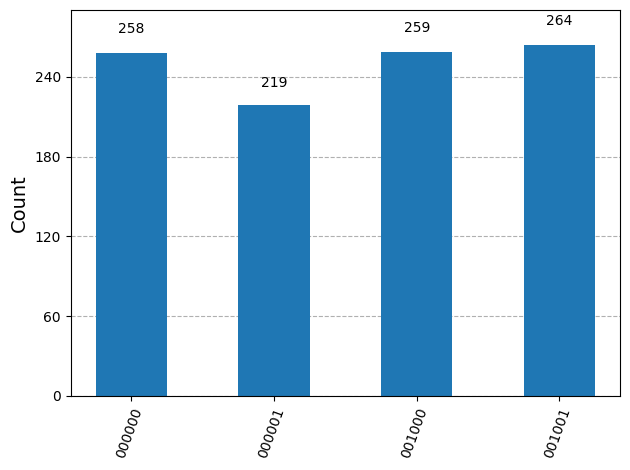

In [10]:
# Assuming qc_ab is your quantum circuit
result = M_simulator.run(qc_aeb,  shots = 1000).result()
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts);

# Let's Look at it a little differently
***

Each of these classes — Alice, Bob, and Eve — defines how the participants generate random bit strings and bases for encoding and measuring qubits.

In [11]:
class Alice:
    def prepareState(self, n):        
        nQubits = int(4 * n) # number of physical qubits        
        a = np.random.randint(2, size=(nQubits,))      # random data bits
        b = np.random.randint(2, size=(nQubits,))      # random bases bits
        return (a, b)
    
# np.random.randint(low, high=None, size=None)

class Bob:
    def generateRandomBasis(self, n):
        nQubits = int(4 * n) # number of physical qubits
        b = np.random.randint(2, size=(nQubits,))
        return b
        
class Eve:
    def generateRandomBasis(self, n):
        nQubits = int(4 * n) # number of physical qubits
        b = np.random.randint(2, size=(nQubits,))
        return b

We construct two circuits: BB84 which has no eavesdroppers and BB84-Eve where Eve eavesdrops by performing measurements before the qubits reach Bob.

Note that we choose $n \leq 8$ (key length) for our experiment. We choose a small key length due to our computational constraints. In practice, one would use a much larger key size.ize.

In [12]:
def BB84Program(key_length):
    
    # key length
    n = key_length
    # number of physical qubits
    nQubits = int(4 * n)
    
    # Creating registers
    qr_1 = QuantumRegister(nQubits, "qr_1")
    cr_1 = ClassicalRegister(nQubits, "cr_1")
    
    qr_2 = QuantumRegister(nQubits, "qr_2")
    cr_2 = ClassicalRegister(nQubits, "cr_2")
    
    bbCircuit = QuantumCircuit(qr_1, cr_1)
    bb_eve_Circuit = QuantumCircuit(qr_2, cr_2)
    
    # Initialize Alice and Bob ... and Eve! ........ Each of these was defined earlier
    alice = Alice()
    bob = Bob()
    eve = Eve()
    
    # Have Alice generate random set of n bits and the corresponding random encoding base
    (a, b) = alice.prepareState(n)
    
    #Preparing Bit String in Qubits
    for i in range(nQubits):
        if a[i] == 1:
            bbCircuit.x(qr_1[i])
            bb_eve_Circuit.x(qr_2[i])

    # Apply gates to encode the bases
    for i in range(nQubits):
        if b[i] == 1:
            bbCircuit.h(qr_1[i])
            bb_eve_Circuit.h(qr_2[i])
    
    # Bob and Eve generate their random basis strings
    b_prime = bob.generateRandomBasis(n)
    b_eve = eve.generateRandomBasis(n)
    
    # Eve makes measurements
    for i in range(nQubits):
        if b_eve[i] == 1:
            bb_eve_Circuit.h(qr_2[i])
    
    # Bob measures the qubits based off of b'
    for i in range(nQubits):
        if b_prime[i] == 1:
            bbCircuit.h(qr_1[i])
    
    bbCircuit.measure(qr_1, cr_1)
    bb_eve_Circuit.measure(qr_2, cr_2)
        
    return (bbCircuit, bb_eve_Circuit, a, b, b_prime)

Once Bob performs his measurements, using this circuit, we can perform steps for determining the key. We define a method to do these steps.

In [13]:
def determineKey(a, bob_meas, b, b_prime, n):
    # Identify indices where b and b' agree
    x = [i for i, (b_i, b_prime_i) in enumerate(zip(b, b_prime)) if b_i == b_prime_i]
    
    # The size of x should be at least 2*n in expectation
    if len(x) < 2 * n:
        # print("Aborting protocol. Less than 2n bits match between b and b'")
        return False
    else:
        # Alice's original secret key, a, subsetted where b and b' agree
        alice_bits = [a[i] for i in x]
        # Bob's measurement in his random basis b', subsetted where b and b' agree
        bob_bits = [bob_meas[i] for i in x]
        
        # Now, we can use half of these bits as "check bits" to see if there was any interference (announcing publicly)
        check_alice = alice_bits[:n]
        key_alice = alice_bits[n:2*n]
        check_bob = bob_bits[:n]
        key_bob = bob_bits[n:2*n]
        
        # Determine the error in the check bits
        mismatch = [c_a != c_b for c_a, c_b in zip(check_alice, check_bob)]
        error = sum(mismatch) / n
        
        # Let's choose epsilon = 0.05 as our error threshold
        epsilon = 0.05
        if error > epsilon:
            return False
        else:
            return True

## Experiment with Simulators

We can run the above circuits in the simulator. This will gives us the results of Bob's measurements using his random basis, in both cases (with or without eavesdropping). If there is no noise or interference by Eve, then Bob's measurements should match up precisely with Alice's key $a$, at the qubits where Alice and Bob both chose the same basis. Hence, we can take this subset of Bob's measurement to use as check bits and key bits. 

We also show the probabilities of various outcomes Bob could see, which are computed by simulating the above circuit using the same $a$, $b$, and $b'$, $2^{10}$ times noting the number of occurences of each outcome.

In [14]:
def testCircuits(shots, key_length):
    # use local qasm simulator
    q, q_eve, a, b, b_prime = BB84Program(key_length)
    
    results = M_simulator.run(q,  shots=shots).result()
    answer = results.get_counts(q)
    
    results_eve = M_simulator.run(q_eve, shots=shots).result()
    answer_eve = results_eve.get_counts(q_eve)
    
    return (answer, answer_eve, a, b, b_prime)

Of course, Bob will not see a probability distribution, but rather one of these particular outcomes. Hence, we'll take one of these outcomes at random.

In [15]:
def getMeasurement(answer, answer_eve):
    bob_meas = list(random.choice(list(answer.keys())))
    bob_meas = list(map(int, bob_meas))
    bob_meas = np.array(bob_meas)[::-1]
    
    bob_meas_eve = list(random.choice(list(answer_eve.keys())))
    bob_meas_eve = list(map(int, bob_meas_eve))
    bob_meas_eve = np.array(bob_meas_eve)[::-1]
    
    return (bob_meas, bob_meas_eve)

In [16]:
def plot_eve_undetected(probs):
    
    objects = ('2','4','7')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, probs, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    
    plt.xlabel("Key Length")
    plt.ylabel('Probability')
    plt.title('Probability of False Positives')
    
    plt.show()

In [17]:
probs = []

print("                 True Positive   False Positive")

for n in [2, 4, 7]:
    succ = 0
    succ_eve = 0
    for i in range(2**8):
        (answer, answer_eve, a, b, b_prime) = testCircuits(1, n)
        bob_meas, bob_meas_eve = getMeasurement(answer, answer_eve)
        res = determineKey(a, bob_meas, b, b_prime, n)
        if res:
            succ += 1
        res = determineKey(a, bob_meas_eve, b, b_prime, n)
        if res:
            succ_eve += 1
    print("For n = ",n, "\t", succ,"/ 256\t", succ_eve,"/ 256")
    p_eve = succ_eve / (2**8)
    probs.append(p_eve)

                 True Positive   False Positive
For n =  2 	 162 / 256	 87 / 256
For n =  4 	 152 / 256	 49 / 256
For n =  7 	 160 / 256	 20 / 256


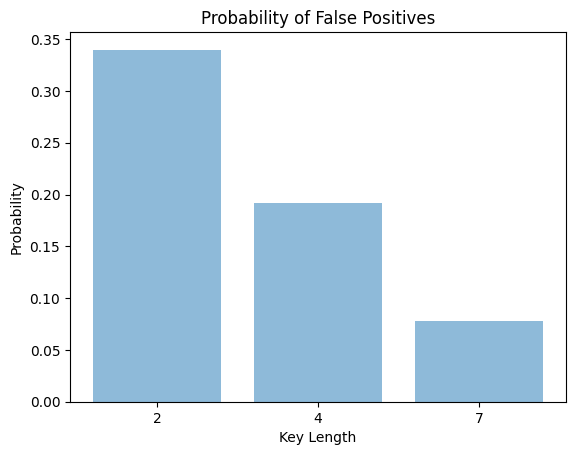

In [18]:
plot_eve_undetected(probs)

## References:

* https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html
* C.H. Bennett and G. Brassard. Quantum cryptography: public key distribution and coin tossing. Proc. IEEE Int. Conf. on Comp. Sys. Signal Process (ICCSSP), page 175, 1984.
* https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_qiskit_2018/cryptography/Cryptography.ipynb
* https://levelup.gitconnected.com/quantum-key-distribution-for-everyone-f08dd5646f33